## Analyse exploratoire et nettoyage de `tmdb_full`

### Introduction
Les étapes suivantes visent à analyser, nettoyer et préparer la table `tmdb_full` pour une utilisation ultérieure. 
Nous allons examiner chaque colonne, effectuer les transformations nécessaires et proposer des recommandations pour les prochaines étapes.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Étape 1 : Chargement des données

In [2]:
# Importation du DataSet :
df_tmdb = pd.read_csv('../gitignore/tmdb_full.csv')


C:\Users\jpvt\AppData\Local\Temp\ipykernel_15028\2694276354.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tmdb = pd.read_csv('../gitignore/tmdb_full.csv')


- #### Traitement de l'avertissement

In [3]:
#Le message d'avertissement précédent nous précise que la colonne d'index 24 contient plusieurs types.
#Nous allons vérifier ce qu'elle contient pour convertir les valeurs en un type unique.
df_tmdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309572 entries, 0 to 309571
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   adult                         309572 non-null  bool   
 1   backdrop_path                 151760 non-null  object 
 2   budget                        309572 non-null  int64  
 3   genres                        309572 non-null  object 
 4   homepage                      44262 non-null   object 
 5   id                            309572 non-null  int64  
 6   imdb_id                       309572 non-null  object 
 7   original_language             309572 non-null  object 
 8   original_title                309572 non-null  object 
 9   overview                      282512 non-null  object 
 10  popularity                    309572 non-null  float64
 11  poster_path                   264159 non-null  object 
 12  production_countries          309572 non-nul

In [4]:
#Il s'agit de la colonne 'production_companies_name' qui devrait contenir des formats str.
#Nous allons donc refaire l'import de la table en modifiant le type de cette colonne.
df_tmdb = pd.read_csv('../gitignore/tmdb_full.csv', dtype={24:'str'})


- #### Aperçu rapide des données

In [5]:
df_tmdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309572 entries, 0 to 309571
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   adult                         309572 non-null  bool   
 1   backdrop_path                 151760 non-null  object 
 2   budget                        309572 non-null  int64  
 3   genres                        309572 non-null  object 
 4   homepage                      44262 non-null   object 
 5   id                            309572 non-null  int64  
 6   imdb_id                       309572 non-null  object 
 7   original_language             309572 non-null  object 
 8   original_title                309572 non-null  object 
 9   overview                      282512 non-null  object 
 10  popularity                    309572 non-null  float64
 11  poster_path                   264159 non-null  object 
 12  production_countries          309572 non-nul

### Étape 2 : Informations générales sur les données

- #### Aperçu rapide des données

In [6]:
df_tmdb = df_tmdb.add_prefix('tmdb_')
df_tmdb.head()


,tmdb_adult,tmdb_backdrop_path,tmdb_budget,tmdb_genres,tmdb_homepage,tmdb_id,tmdb_imdb_id,tmdb_original_language,tmdb_original_title,tmdb_overview,...,tmdb_runtime,tmdb_spoken_languages,tmdb_status,tmdb_tagline,tmdb_title,tmdb_video,tmdb_vote_average,tmdb_vote_count,tmdb_production_companies_name,tmdb_production_companies_country
0,False,/dvQj1GBZAZirz1skEEZyWH2ZqQP.jpg,0,['Comedy'],NaN,3924,tt0029927,en,Blondie,Blondie and Dagwood are about to celebrate the...,...,70,['en'],Released,The favorite comic strip of millions at last o...,Blondie,False,7.214,7,['Columbia Pictures'],['US']
1,False,NaN,0,['Adventure'],NaN,6124,tt0011436,de,Der Mann ohne Namen,NaN,...,420,[],Released,NaN,"Peter Voss, Thief of Millions",False,0.000,0,[],[]
2,False,/uJlc4aNPF3Y8yAqahJTKBwgwPVW.jpg,0,"['Drama', 'Romance']",NaN,8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,...,110,"['it', 'ja', 'pl', 'fr', 'de']",Released,The Intimate Secrets of Young Lovers,Love at Twenty,False,6.700,41,"['Ulysse Productions', 'Unitec Films', 'Cinese...","['', 'NZ', 'IT', 'JP', 'DE', 'PL', '']"
3,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,0,"['Drama', 'Comedy', 'Crime']",NaN,2,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,73,['fi'],Released,NaN,Ariel,False,7.046,248,['Villealfa Filmproductions'],['FI']
4,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,0,"['Drama', 'Comedy', 'Romance']",NaN,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,76,['en'],Released,NaN,Shadows in Paradise,False,7.182,269,['Villealfa Filmproductions'],['FI']


- #### Identification des valeurs manquantes

In [7]:
df_tmdb.isna().sum()


tmdb_adult                                0
tmdb_backdrop_path                   157812
tmdb_budget                               0
tmdb_genres                               0
tmdb_homepage                        265310
tmdb_id                                   0
tmdb_imdb_id                              0
tmdb_original_language                    0
tmdb_original_title                       0
tmdb_overview                         27060
tmdb_popularity                           0
tmdb_poster_path                      45413
tmdb_production_countries                 0
tmdb_release_date                      8233
tmdb_revenue                              0
tmdb_runtime                              0
tmdb_spoken_languages                     0
tmdb_status                               0
tmdb_tagline                         234999
tmdb_title                                0
tmdb_video                                0
tmdb_vote_average                         0
tmdb_vote_count                 

In [8]:
df_tmdb['tmdb_budget'].value_counts()

tmdb_budget
0           284508
1000000        657
2000000        535
500000         500
5000000        484
             ...  
1049552          1
41900000         1
646955           1
38272500         1
16077            1
Name: count, Length: 3597, dtype: int64

In [9]:
df_tmdb['tmdb_revenue'].value_counts()

tmdb_revenue
0           294465
1000000         66
2000000         59
10000000        49
500000          48
             ...  
2260712          1
354628           1
17193231         1
9709451          1
8430000          1
Name: count, Length: 12865, dtype: int64

Ce sont des valeurs numériques qui apparaissent non nulles mais énormément de valeurs ne sont pas renseignées. On ne va donc pas tenir compte de ces données pour notre modèle de prédiction qui serait faussé.

- #### Identification des doublons

In [10]:
df_tmdb['tmdb_imdb_id'].duplicated().sum()


0

- #### Identification des films pour adultes

In [11]:
df_tmdb['tmdb_adult'].value_counts()


tmdb_adult
False    309571
True          1
Name: count, dtype: int64

In [12]:
df_tmdb = df_tmdb[df_tmdb['tmdb_adult'] != True]


In [13]:
df_tmdb['tmdb_adult'].value_counts()


tmdb_adult
False    309571
Name: count, dtype: int64

- #### Conversion des colonnes `release_date`

In [14]:
#On transforme les dates au format datetime et on extrait l'année (les valeurs nulles sont remplacées par 0)
df_tmdb['tmdb_release_date'] = df_tmdb['tmdb_release_date'].apply(lambda date: pd.to_datetime(date))
df_tmdb['tmdb_release_date'] = df_tmdb['tmdb_release_date'].dt.year.fillna(0).astype(int)


### Étape 3 : Nettoyage des colonnes `genres` et `production_countries`

In [15]:
#On crée un dataframe qui comporte tous les genres pour chaque films
df_tmdb['tmdb_genres'] = df_tmdb['tmdb_genres'].apply(lambda genre: eval(genre))
df_genres = df_tmdb['tmdb_genres'].apply(pd.Series)
df_genres.head()


,0,1,2,3,4,5,6,7,8,9,10
0,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Drama,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Drama,Comedy,Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Drama,Comedy,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#On renomme chaque colonne
df_genres.columns = [f'genre{i+1}' for i in range(df_genres.shape[1])]

#On crée une liste qui comprend chaque genre non nul représenté
liste_genres = list(df_genres['genre1'][~df_genres['genre1'].isna()].unique())
liste_genres


['Comedy',
 'Adventure',
 'Drama',
 'Crime',
 'Action',
 'Documentary',
 'Animation',
 'Mystery',
 'Horror',
 'Western',
 'Science Fiction',
 'Thriller',
 'Romance',
 'Fantasy',
 'Family',
 'History',
 'Music',
 'War',
 'TV Movie']

In [17]:
#Pour chaque genre de la liste des genres, on crée un colonne correspondant à ce genre
#Pour chaque ligne, True ou False dans chaque colonne si le genre est présent dans la colonne 'tmdb_genres'
for genre in liste_genres:
    df_tmdb[f'tmdb_{genre}'] = df_tmdb['tmdb_genres'].apply(lambda x: genre in x)
df_tmdb.head()


,tmdb_adult,tmdb_backdrop_path,tmdb_budget,tmdb_genres,tmdb_homepage,tmdb_id,tmdb_imdb_id,tmdb_original_language,tmdb_original_title,tmdb_overview,...,tmdb_Western,tmdb_Science Fiction,tmdb_Thriller,tmdb_Romance,tmdb_Fantasy,tmdb_Family,tmdb_History,tmdb_Music,tmdb_War,tmdb_TV Movie
0,False,/dvQj1GBZAZirz1skEEZyWH2ZqQP.jpg,0,[Comedy],NaN,3924,tt0029927,en,Blondie,Blondie and Dagwood are about to celebrate the...,...,False,False,False,False,False,False,False,False,False,False
1,False,NaN,0,[Adventure],NaN,6124,tt0011436,de,Der Mann ohne Namen,NaN,...,False,False,False,False,False,False,False,False,False,False
2,False,/uJlc4aNPF3Y8yAqahJTKBwgwPVW.jpg,0,"[Drama, Romance]",NaN,8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,...,False,False,False,True,False,False,False,False,False,False
3,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,0,"[Drama, Comedy, Crime]",NaN,2,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,False,False,False,False,False,False,False,False,False,False
4,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,0,"[Drama, Comedy, Romance]",NaN,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,False,False,False,True,False,False,False,False,False,False


In [18]:
#On crée un dataframe qui comporte tous les nationalités des productions pour chaque films
df_tmdb['tmdb_production_countries'] = df_tmdb['tmdb_production_countries'].apply(lambda genre: eval(genre))
df_production = df_tmdb['tmdb_production_countries'].apply(pd.Series)
df_production.head()


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DE,FR,IT,JP,PL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#On compte le nombre d'occurences pour chaque nationalité du tableau. La fonction .ravel() nous permet d'applatir le tableau en 1D
df_nationalite = pd.value_counts(df_production.values.ravel())


C:\Users\jpvt\AppData\Local\Temp\ipykernel_15028\2123025707.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_nationalite = pd.value_counts(df_production.values.ravel())


In [20]:
#On crée une liste qui comprend les 30 nationalités les plus représentées
liste_nationalite = df_nationalite.head(30).index.to_list()
liste_nationalite

#Nous avons décidé d'ajouter à cette liste les 5 pays les plus représentés en Afrique et au Moyen Orient et ainsi avoir une représentation de chaque continent
[liste_nationalite.append(i) for i in ['IR', 'XG', 'EG', 'NG', 'ZA']]


[None, None, None, None, None]

In [21]:
len(liste_nationalite)

35

In [22]:
#Pour chaque nationalité de la liste des nationalités, on crée un colonne correspondant à cette nationalité
#Pour chaque ligne, True ou False dans chaque colonne si la nationalité est présente dans la colonne 'tmdb_genres'
for nationalite in liste_nationalite:
    df_tmdb[f'tmdb_{nationalite}'] = df_tmdb['tmdb_production_countries'].apply(lambda x: nationalite in x)


In [23]:
df_tmdb.head()

,tmdb_adult,tmdb_backdrop_path,tmdb_budget,tmdb_genres,tmdb_homepage,tmdb_id,tmdb_imdb_id,tmdb_original_language,tmdb_original_title,tmdb_overview,...,tmdb_PL,tmdb_CH,tmdb_XC,tmdb_FI,tmdb_NO,tmdb_IR,tmdb_XG,tmdb_EG,tmdb_NG,tmdb_ZA
0,False,/dvQj1GBZAZirz1skEEZyWH2ZqQP.jpg,0,[Comedy],NaN,3924,tt0029927,en,Blondie,Blondie and Dagwood are about to celebrate the...,...,False,False,False,False,False,False,False,False,False,False
1,False,NaN,0,[Adventure],NaN,6124,tt0011436,de,Der Mann ohne Namen,NaN,...,False,False,False,False,False,False,False,False,False,False
2,False,/uJlc4aNPF3Y8yAqahJTKBwgwPVW.jpg,0,"[Drama, Romance]",NaN,8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,...,True,False,False,False,False,False,False,False,False,False
3,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,0,"[Drama, Comedy, Crime]",NaN,2,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,False,False,False,True,False,False,False,False,False,False
4,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,0,"[Drama, Comedy, Romance]",NaN,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,False,False,False,True,False,False,False,False,False,False


In [24]:
#On vérifie le status des films
df_tmdb['tmdb_status'].value_counts()


tmdb_status
Released           306290
Post Production      1261
In Production        1006
Planned               946
Canceled               36
Rumored                32
Name: count, dtype: int64

In [25]:
#On filtre pour ne garder que les films qui sont sortis
df_tmdb = df_tmdb[df_tmdb['tmdb_status'] == 'Released']


### Étape 4 : Exploration et analyse graphique

In [26]:
df_tmdb.describe()


,tmdb_budget,tmdb_id,tmdb_popularity,tmdb_release_date,tmdb_revenue,tmdb_runtime,tmdb_vote_average,tmdb_vote_count
count,3.062900e+05,3.062900e+05,306290.000000,306290.000000,3.062900e+05,306290.000000,306290.000000,306290.00000
mean,8.705651e+05,4.036207e+05,2.721338,1956.479415,2.269410e+06,71.026413,4.148623,66.06485
std,8.153086e+06,3.189409e+05,21.256845,271.764739,3.036212e+07,95.401274,2.986134,591.17464
min,0.000000e+00,2.000000e+00,0.600000,0.000000,0.000000e+00,0.000000,0.000000,0.00000
25%,0.000000e+00,1.294032e+05,0.600000,1976.000000,0.000000e+00,24.000000,0.000000,0.00000
50%,0.000000e+00,3.302110e+05,1.088000,2004.000000,0.000000e+00,85.000000,5.100000,2.00000
75%,0.000000e+00,6.094120e+05,1.998000,2015.000000,0.000000e+00,98.000000,6.404000,9.00000
max,5.793304e+08,1.122427e+06,5089.969000,2023.000000,2.923706e+09,43200.000000,10.000000,33630.00000


In [27]:
#On crée une variable des genres les plus représentés pour nos analyses visuelles.
max_genres = df_tmdb['tmdb_genres'].value_counts().head(10)


In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(x=max_genres.index, y=max_genres.values)
plt.title("Répartition des dix genres les plus représentés")
plt.xlabel("")
plt.ylabel("Nombre de films")
plt.xticks(rotation=45)
plt.show()

TypeError: unhashable type: 'list'

<Figure size 1000x500 with 0 Axes>

In [ ]:
#Moyenne des durées de films par genre:
df_duree = pd.DataFrame({})
df_duree['moyenne']=df_tmdb.groupby('tmdb_genres')['tmdb_runtime'].mean()
df_duree['mediane']=df_tmdb.groupby('tmdb_genres')['tmdb_runtime'].median()
df_duree = df_duree.reset_index()


<Figure size 2000x500 with 0 Axes>

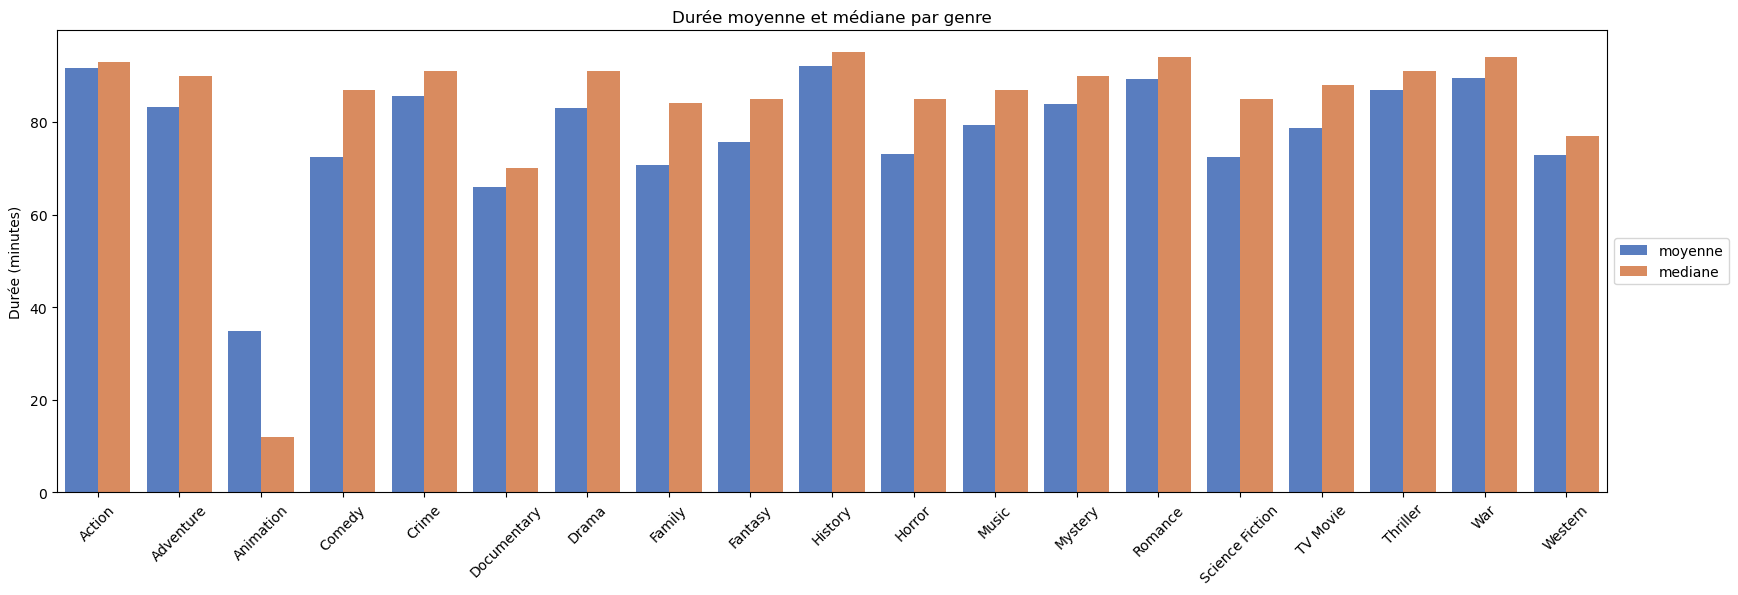

In [ ]:
plt.figure(figsize=(20, 5))
df_long = pd.melt(df_duree, id_vars='genres', value_vars=['moyenne', 'mediane'],
                  var_name='statistique', value_name='valeur')


# Création du barplot
plt.figure(figsize=(20, 6))
sns.barplot(data=df_long, x='genres', y='valeur', hue='statistique', palette='muted')
plt.title('Durée moyenne et médiane par genre')
plt.ylabel('Durée (minutes)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
#Note moyenne des films par genre:
df_vote_average = pd.DataFrame({})
df_vote_average['moyenne'] = df_tmdb.groupby('tmdb_genres')['tmdb_vote_average'].mean()
df_vote_average['mediane'] = df_tmdb.groupby('tmdb_genres')['tmdb_vote_average'].median()
df_vote_average = df_vote_average.reset_index()


<Figure size 2000x500 with 0 Axes>

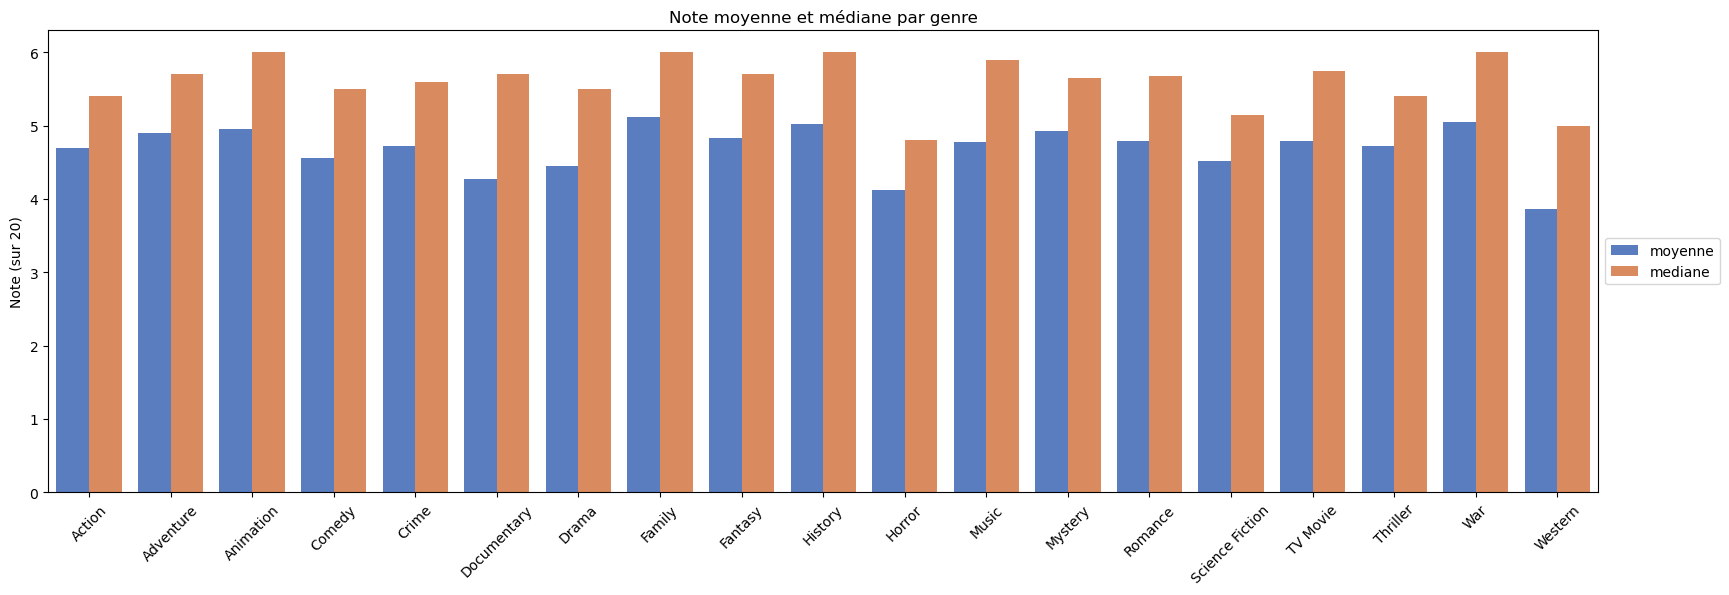

In [ ]:
plt.figure(figsize=(20, 5))
df_long = pd.melt(df_vote_average, id_vars='genres', value_vars=['moyenne', 'mediane'],
                  var_name='statistique', value_name='valeur')


# Création du barplot
plt.figure(figsize=(20, 6))
sns.barplot(data=df_long, x='genres', y='valeur', hue='statistique', palette='muted')
plt.title('Note moyenne et médiane par genre')
plt.ylabel('Note (sur 20)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
#Nombre de votants moyen par genre:
df_vote_count = pd.DataFrame({})
df_vote_count['moyenne'] = df_tmdb.groupby('tmdb_genres')['tmdb_vote_count'].mean()
df_vote_count['mediane'] = df_tmdb.groupby('tmdb_genres')['tmdb_vote_count'].median()
df_vote_count = df_vote_count.reset_index()


<Figure size 2000x500 with 0 Axes>

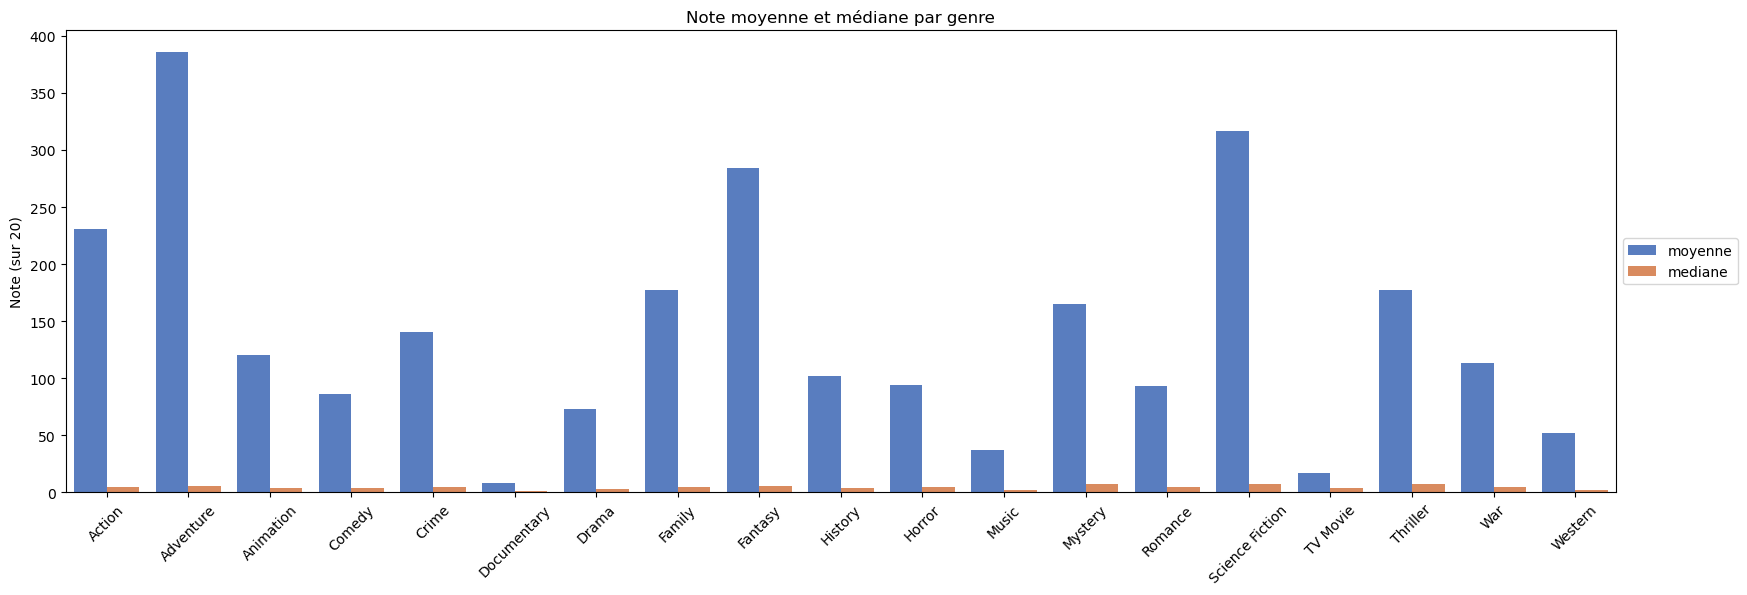

In [ ]:
plt.figure(figsize=(20, 5))
df_long = pd.melt(df_vote_count, id_vars='genres', value_vars=['moyenne', 'mediane'],
                  var_name='statistique', value_name='valeur')


# Création du barplot
plt.figure(figsize=(20, 6))
sns.barplot(data=df_long, x='genres', y='valeur', hue='statistique', palette='muted')
plt.title('Note moyenne et médiane par genre')
plt.ylabel('Note (sur 20)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


**Il faudra bien faire attention aux valeurs sur lesquelles ont décidera d'appliquer nos filtres pour les recommandations. Il y'a de gros écarts entre les moyennes et médianes dans certains cas, à cause de valeurs très élevées qui peuvent biaiser la moyenne. La médiane sera, dans ces cas précis, plus intéressante à utiliser pour ne pas se priver d'une trop grande partie de nos données.**

In [29]:
df_tmdb_ml = df_tmdb.drop(columns=['tmdb_adult', 'tmdb_backdrop_path', 'tmdb_budget', 'tmdb_genres', 'tmdb_homepage', 'tmdb_id', 'tmdb_original_language', 'tmdb_original_title',
                                    'tmdb_overview', 'tmdb_poster_path', 'tmdb_revenue', 'tmdb_production_countries', 'tmdb_spoken_languages', 'tmdb_status', 'tmdb_tagline', 
                                    'tmdb_title', 'tmdb_video', 'tmdb_production_companies_name', 'tmdb_production_companies_country'])
df_tmdb_ml.head()

,tmdb_imdb_id,tmdb_popularity,tmdb_release_date,tmdb_runtime,tmdb_vote_average,tmdb_vote_count,tmdb_Comedy,tmdb_Adventure,tmdb_Drama,tmdb_Crime,...,tmdb_PL,tmdb_CH,tmdb_XC,tmdb_FI,tmdb_NO,tmdb_IR,tmdb_XG,tmdb_EG,tmdb_NG,tmdb_ZA
0,tt0029927,2.852,1938,70,7.214,7,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0011436,1.091,1921,420,0.000,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,tt0055747,3.770,1962,110,6.700,41,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,tt0094675,9.214,1988,73,7.046,248,True,False,True,True,...,False,False,False,True,False,False,False,False,False,False
4,tt0092149,6.282,1986,76,7.182,269,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [30]:
df_tmdb_ml.reset_index(drop=True, inplace=True)

In [31]:
df_tmdb_info = df_tmdb[['tmdb_genres', 'tmdb_homepage', 'tmdb_imdb_id', 'tmdb_original_language', 'tmdb_original_title', 'tmdb_overview', 'tmdb_popularity', 'tmdb_poster_path',
                    'tmdb_production_countries', 'tmdb_release_date', 'tmdb_runtime', 'tmdb_tagline', 'tmdb_vote_average', 'tmdb_vote_count', 'tmdb_production_companies_name']]
df_tmdb_info.head()

,tmdb_genres,tmdb_homepage,tmdb_imdb_id,tmdb_original_language,tmdb_original_title,tmdb_overview,tmdb_popularity,tmdb_poster_path,tmdb_production_countries,tmdb_release_date,tmdb_runtime,tmdb_tagline,tmdb_vote_average,tmdb_vote_count,tmdb_production_companies_name
0,[Comedy],NaN,tt0029927,en,Blondie,Blondie and Dagwood are about to celebrate the...,2.852,/zBiHKhXklvTFwj4M1uEUcQGAVJ.jpg,[US],1938,70,The favorite comic strip of millions at last o...,7.214,7,['Columbia Pictures']
1,[Adventure],NaN,tt0011436,de,Der Mann ohne Namen,NaN,1.091,/6xUbUCvndklbGVYiljHr34NTxSl.jpg,[DE],1921,420,NaN,0.000,0,[]
2,"[Drama, Romance]",NaN,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.770,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,"[DE, FR, IT, JP, PL]",1962,110,The Intimate Secrets of Young Lovers,6.700,41,"['Ulysse Productions', 'Unitec Films', 'Cinese..."
3,"[Drama, Comedy, Crime]",NaN,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,9.214,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,[FI],1988,73,NaN,7.046,248,['Villealfa Filmproductions']
4,"[Drama, Comedy, Romance]",NaN,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",6.282,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,[FI],1986,76,NaN,7.182,269,['Villealfa Filmproductions']


In [33]:
df_tmdb_info.reset_index(drop=True, inplace=True)

In [34]:
#Lien de la table nettoyée pour ML
df_tmdb_ml.to_csv('../gitignore/tmdb_ml_final.csv', sep= ',', index = False)


In [35]:
#Lien de la table nettoyée pour info
df_tmdb_info.to_csv('../gitignore/tmdb_info_final.csv', sep= ',', index = False)